In [1]:
# one-class classification using Isolation Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot
import os
from sklearn.metrics import confusion_matrix,f1_score

In [2]:
# load  preprocessed dataset
data=pd.read_csv("train.csv")
#convert data from dataframe to matrix
data_new=data.values

#Split data into training data (X) and target label(Y)
X=data_new[:,:-1] #gets elements of array but the last one
Y=data_new[:,-1]

In [3]:
# check the distribution of label column
data['Label'].value_counts()

0    667378
1    379737
Name: Label, dtype: int64

In [4]:
# percentage of label column

data['Label'].value_counts()/np.float(len(data))

0    0.637349
1    0.362651
Name: Label, dtype: float64

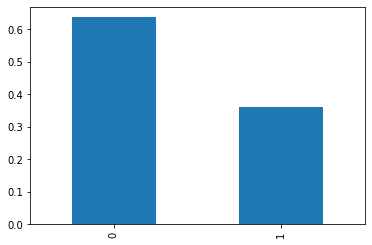

In [5]:
# view the distribution of percentages within the label column

(data['Label'].value_counts()/np.float(len(data))).plot.bar()

In [6]:
import joblib
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X = ss.fit_transform(X)
joblib.dump(ss, 'IFScaler.pkl')

['IFScaler.pkl']

In [7]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.30,random_state=4)

In [8]:
# define outlier detection model
model = IsolationForest(n_estimators=10000, max_samples='auto', contamination='auto', behaviour='deprecated',bootstrap=False, n_jobs=None, random_state=42, verbose=0, warm_start=False)
# fit on majority class
x_train = x_train[y_train==0]
from time import time
t0 = time()
history=model.fit(x_train)
tf = time() - t0
print ("Isolation Forest model trained in {} seconds".format(round(tf, 3)))


Isolation Forest model trained in 1120.405 seconds


In [9]:
# detect outliers in the test set
pred = model.predict(x_test)
# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
# calculate score
#score1 = f1_score(y_test, pred, pos_label=1)
score1 = f1_score(y_test, pred, pos_label=-1)
print('F1 Score: %.3f' % score1)


F1 Score: 0.716


In [12]:
from sklearn.metrics import roc_auc_score
score2= roc_auc_score(y_test, pred)
print('AUC Score: %.3f' % score2)

from sklearn.metrics import accuracy_score
score3= accuracy_score(y_test, pred)
print('Accuracy Score: %.3f' % score3)

AUC Score: 0.777
Accuracy Score: 0.807


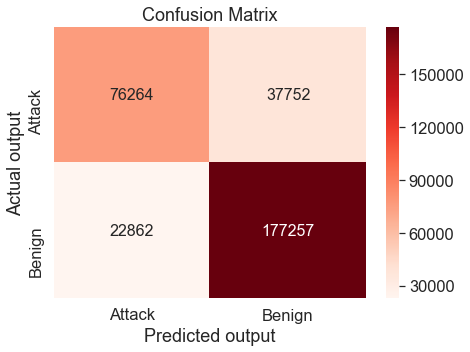

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
res = confusion_matrix(y_test,pred)
import seaborn as sns
dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = dpi * 1.5
import matplotlib.pyplot as plt
target_names= {"Attack", "Benign"}
%matplotlib inline
sns.set(font_scale=1.5)#for label size
fig,ax = plt.subplots(figsize=(7,5))
sns.heatmap (res,annot=True,fmt="d",annot_kws={"size": 16}, cmap="Reds", ax=ax,xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted output')
plt.ylabel('Actual output')
plt.title('Confusion Matrix')
plt.show()

In [15]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import *
target_names = ['Benign', 'Attack']


y_pred1 = model.predict(x_test)
print(classification_report(y_test, y_pred1, target_names=target_names, digits=3))

##print the confusion matrix
res = confusion_matrix(y_test,y_pred1)
print("Confusion matrix:")
print(res)

tn = res[0][0]
fp = res[0][1]
fn = res[1][0]
tp = res[1][1]



###print other results separately
print("\nTotal number of true positives(Attack identified as Attack))", tp)

print("Total number of false negatives (Attack identified as Benign)",fn)

print("Total number of false positives(Benign identified as Attack)",fp)

print("Total number of true negatives (Benign identified as Benign)",tn)

rp=tp+fn
rn=fp+tn
pp=tp+fp
pn=tn+fn

print("Real positives:",rp)
print("Real negatives:",rn)
print("Predicted positives:",pp)
print("Predicted negatives:",pn)

tpr = float(tp)/(tp+fn)
print("True Positive Rate (TPR/Recall/Sensitivity/Hit rate):", tpr)

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR)/Fall out:",fpr)

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR/Miss Rate):",fnr)

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):", specificity)

precision=float(tp)/(tp+fp)

print("Total number of correct predictions(Precision/Positive Predictive value/PPV):",precision)

npv = tn / (tn + fn)
print("Negative Predictive value (NPV):",npv)

fdr = fp/ (fp + tp)

print("False Discovery Rate (FDR):",fdr)

fScore = 2*((precision*tpr)/(precision+tpr))

print("F1-Score:", fScore)

mcc=((tp*tn-fp*fn)/sqrt((tp+fp)*(tp+fn)))/sqrt((tn+fp) *(tn+fn))

print ("Mathews Correlation Coefficient (MCC):", mcc)

informedness= tpr + specificity -1

print("Informedness:", informedness)


markedness = precision + npv -1
print("Markedness:", markedness)


acc=float(tp+tn)/(tp+tn+fp+fn)
print("Accuracy:", acc)

error_rate= 1-acc

print ( "Misclassification/ error rate",error_rate)

              precision    recall  f1-score   support

      Benign      0.769     0.669     0.716    114016
      Attack      0.824     0.886     0.854    200119

    accuracy                          0.807    314135
   macro avg      0.797     0.777     0.785    314135
weighted avg      0.804     0.807     0.804    314135

Confusion matrix:
[[ 76264  37752]
 [ 22862 177257]]

Total number of true positives(Attack identified as Attack)) 177257
Total number of false negatives (Attack identified as Benign) 22862
Total number of false positives(Benign identified as Attack) 37752
Total number of true negatives (Benign identified as Benign) 76264
Real positives: 200119
Real negatives: 114016
Predicted positives: 215009
Predicted negatives: 99126
True Positive Rate (TPR/Recall/Sensitivity/Hit rate): 0.8857579740054667
False Positive Rate (FPR)/Fall out: 0.3311114229581813
False Negative Rate (FNR/Miss Rate): 0.11424202599453326
True Negative Rate (TNR/Specificity/selectivity): 0.66888857704

In [16]:
import pickle 
import joblib
pickle.dump(model, open("IFmodel.dat", "wb"))

In [ ]:
#############Test on synthesized datasets###########

In [17]:
#########For Synthesized Slow httptest attack##############
synth_data=pd.read_csv("ShttpAA1.csv")
#convert data from dataframe to matrix
synth_data_new=synth_data.values

#Split data into training data (X) and target label(Y)
X_test1=synth_data_new[:,:-1] #gets elements of array but the last one
Y_test1=synth_data_new[:,-1]


#########For Synthesized Slowloris attack##############
synth_data1=pd.read_csv("SlowAA1.csv")
synth_data_new1=synth_data1.values

X_test2=synth_data_new1[:,:-1] 
Y_test2=synth_data_new1[:,-1]


In [18]:
# load model from file
model2 = pickle.load(open("IFmodel.dat", "rb"))

In [19]:
scaler = joblib.load('IFScaler.pkl')
X_test1=scaler.transform(X_test1)
X_test2=scaler.transform(X_test2)

In [20]:
# detect outliers in the Slow httptest data
pred1 = model2.predict(X_test1)
# mark inliers 1, outliers -1
Y_test1[Y_test1 == 1] = -1
Y_test1[Y_test1 == 0] = 1
# calculate score
score11 = f1_score(Y_test1, pred1, pos_label=-1)
print('F1 Score Slow httptest: %.3f' % score11)

# detect outliers in the Slowloris data
pred2 = model.predict(X_test2)
# mark inliers 1, outliers -1
Y_test2[Y_test2 == 1] = -1
Y_test2[Y_test2 == 0] = 1
# calculate score
score22 = f1_score(Y_test2, pred2, pos_label=-1)
print('F1 Score slowloris: %.3f' % score22)

F1 Score Slow httptest: 0.000
F1 Score slowloris: 0.000


In [21]:
# accuracy Slow httptest data
from sklearn.metrics import accuracy_score
score12= accuracy_score(Y_test1, pred1)
print('Accuracy Score Slow httptest: %.3f' % score12)


# accuracy Slowloris data
from sklearn.metrics import accuracy_score
score21= accuracy_score(Y_test2, pred2)
print('Accuracy Score Slowloris: %.3f' % score21)

Accuracy Score Slow httptest: 0.068
Accuracy Score Slowloris: 0.227


In [22]:
#confusion matrix for Slow httptest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import *
target_names = ['Benign', 'Attack']
pred1 = model.predict(X_test1)
print(classification_report(Y_test1, pred1, target_names=target_names, digits=3))

#print the confusion matrix
res1 = confusion_matrix(Y_test1, pred1)
print("Confusion matrix:")
print(res1)

tn = res1[0][0]
fp = res1[0][1]
fn = res1[1][0]
tp = res1[1][1]

print("\nTotal number of true positives(Benign identified as Benign))", tp)

print("Total number of false negatives (Benign identified as Attack)",fn)

print("Total number of false positives(Attack identified as benign)",fp)

print("Total number of true negatives (Attack identified as Attack)",tn)

rp=tp+fn
rn=fp+tn
pp=tp+fp
pn=tn+fn

print("Real positives:",rp)
print("Real negatives:",rn)
print("Predicted positives:",pp)
print("Predicted negatives:",pn)

              precision    recall  f1-score   support

      Benign      0.000     0.000     0.000      1473
      Attack      0.073     0.475     0.127       244

    accuracy                          0.068      1717
   macro avg      0.037     0.238     0.063      1717
weighted avg      0.010     0.068     0.018      1717

Confusion matrix:
[[   0 1473]
 [ 128  116]]

Total number of true positives(Benign identified as Benign)) 116
Total number of false negatives (Benign identified as Attack) 128
Total number of false positives(Attack identified as benign) 1473
Total number of true negatives (Attack identified as Attack) 0
Real positives: 244
Real negatives: 1473
Predicted positives: 1589
Predicted negatives: 128


In [23]:
#confusion matrix for Slowloris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import *
target_names = ['Benign', 'Attack']
pred2 = model.predict(X_test2)
print(classification_report(Y_test2, pred2, target_names=target_names, digits=3))


res2 = confusion_matrix(Y_test2, pred2)
print("Confusion matrix:")
print(res2)

tn = res2[0][0]
fp = res2[0][1]
fn = res2[1][0]
tp = res2[1][1]

print("\nTotal number of true positives(Benign identified as Benign))", tp)

print("Total number of false negatives (Benign identified as Attack)",fn)

print("Total number of false positives(Attack identified as Benign)",fp)

print("Total number of true negatives (Attack identified as Attack)",tn)

rp=tp+fn
rn=fp+tn
pp=tp+fp
pn=tn+fn

print("Real positives:",rp)
print("Real negatives:",rn)
print("Predicted positives:",pp)
print("Predicted negatives:",pn)

              precision    recall  f1-score   support

      Benign      0.000     0.000     0.000       268
      Attack      0.302     0.475     0.369       244

    accuracy                          0.227       512
   macro avg      0.151     0.238     0.185       512
weighted avg      0.144     0.227     0.176       512

Confusion matrix:
[[  0 268]
 [128 116]]

Total number of true positives(Benign identified as Benign)) 116
Total number of false negatives (Benign identified as Attack) 128
Total number of false positives(Attack identified as Benign) 268
Total number of true negatives (Attack identified as Attack) 0
Real positives: 244
Real negatives: 268
Predicted positives: 384
Predicted negatives: 128
